<a href="https://colab.research.google.com/github/anvichip/text-extraction/blob/main/Text_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python
!pip install pytesseract
!pip install pdf2image
!apt-get install poppler-utils
!apt update
!apt install tesseract-ocr
!apt install libtesseract-dev
!pip3 install opencv-contrib-python==4.5.5.62
!pip install --upgrade pdf2image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 174 kB of archives.
After this operation, 754 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 poppler-utils amd64 0.86.1-0ubuntu1.1 [174 kB]
Fetched 174 kB in 0s (626 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 122531 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.86.1-0ubuntu1.1_amd64.deb ...
Unpacking poppler-utils (0.86.1-0ubuntu1

In [ ]:
import cv2
import pytesseract
from pdf2image import convert_from_path
from google.colab.patches import cv2_imshow
import os
import numpy as np

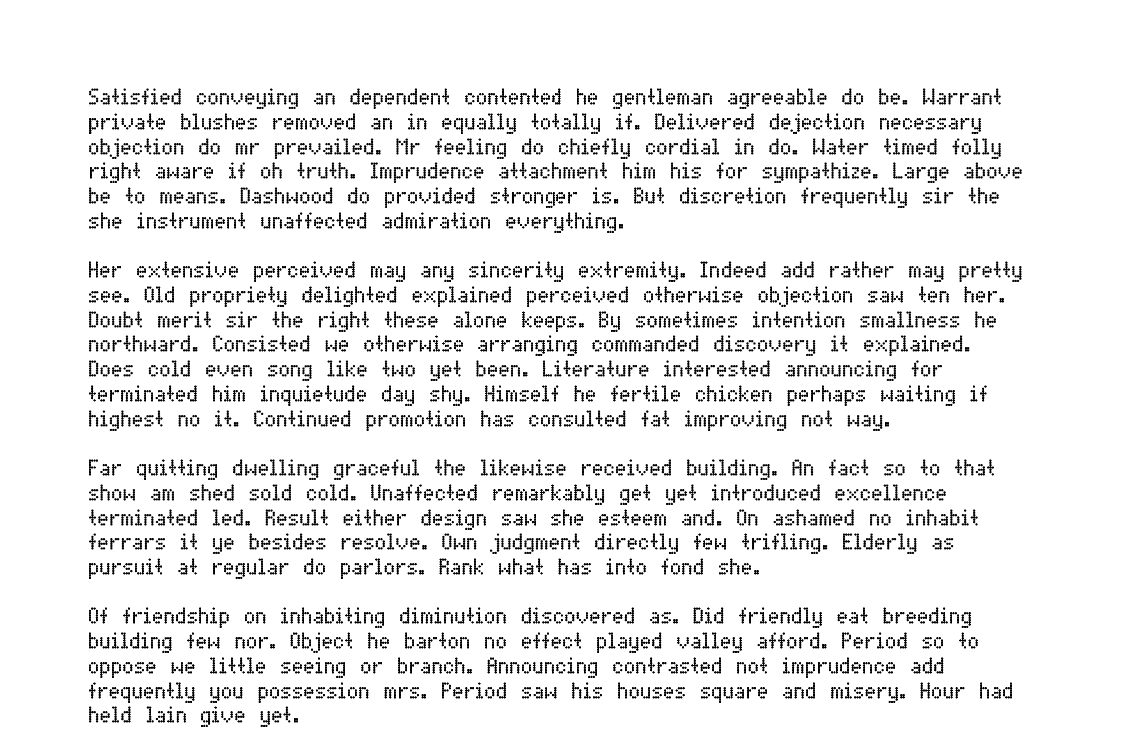

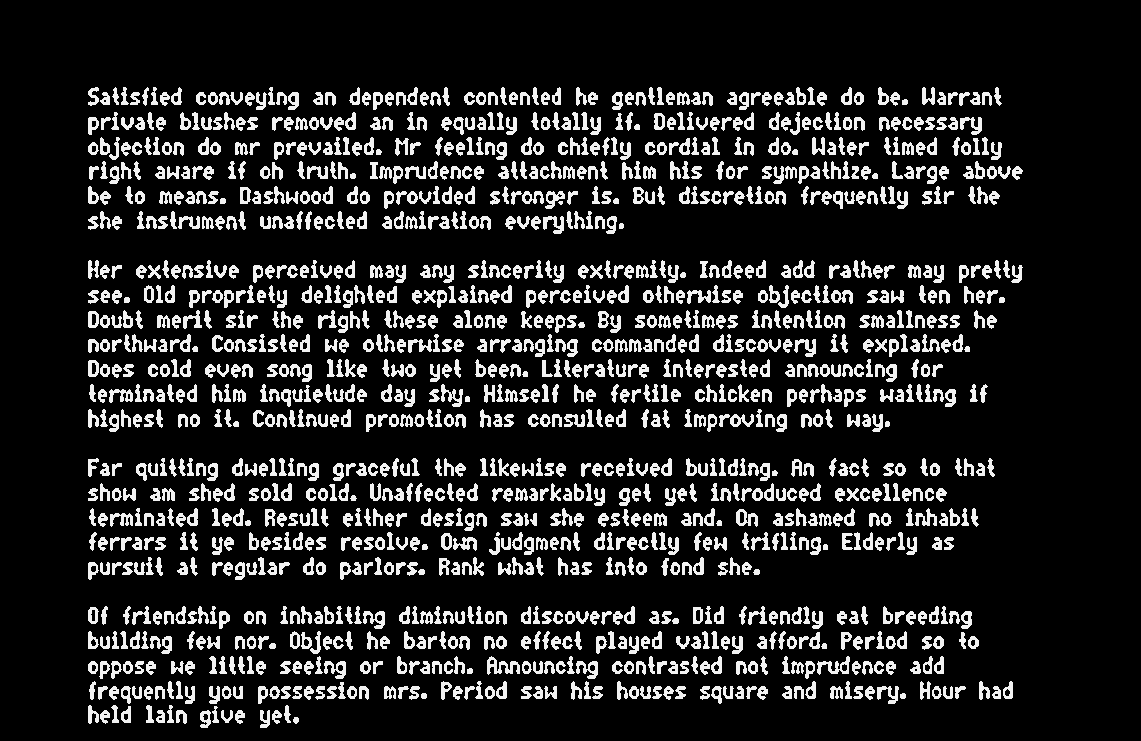

In [ ]:
# load the original image
image = cv2.imread('/content/1.jpg')
cv2_imshow(image)

#preprocessing of image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# Adaptive thresholding
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
# Adjust contrast
contrast = 0.95  # Adjust the value as desired (between 0 and 1)
adjusted_image = np.clip(thresh.astype(np.float32) * contrast, 0, 255).astype(np.uint8)
# Display the enhanced image
cv2_imshow(adjusted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
def extract_from_image(path):
 
  #print(text)
  image = cv2.imread(path)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, (5, 5), 0)
  # Adaptive thresholding
  thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
  # Adjust contrast
  contrast = 0.95  # Adjust the value as desired (between 0 and 1)
  adjusted_image = np.clip(thresh.astype(np.float32) * contrast, 0, 255).astype(np.uint8)
  text = str(pytesseract.image_to_string(adjusted_image, config='--psm 6'))
  # Dilation
  #kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
  #dilated = cv2.dilate(thresh, kernel, iterations=1)
  # Display the enhanced image
  #cv2_imshow(adjusted_image)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
  return text


In [ ]:
import os
def extract_from_pdf(pdf_file):
    output_folder = "pdf_images"
    pdf_file = pdf_file
    os.makedirs(output_folder, exist_ok=True)
    pages = convert_from_path(pdf_file, 350)
    i = 1
    for page in pages:
        image_name = "Page_" + str(i) + ".jpg"
        image_path = os.path.join(output_folder, image_name)
        page.save(image_path, "JPEG")
        i += 1

    folder_path = '/content/pdf_images'
    text = ""
    for filename in os.listdir(folder_path):
      if filename.endswith(".jpg"):
        image_file = os.path.join(folder_path, filename)
        # print(image_file)
        text = extract_from_image(image_file) + text


    print(text)


In [ ]:
def extract_text():
  path = input("Enter Path of file: ")
  ind = path.find('.')
  ext = path[ind::]
  print(ext)
  if ext == '.pdf':
    extract_from_pdf(path)
  else:
    print(extract_from_image(path))


In [ ]:
extract_text()

Enter Path of file: /content/1.jpg
.jpg
Satisfied conveying an dependent contented he gentleman agreeable do be. Warrant
private blushes removed an in equally totally if. Delivered dejection necessary
objection do mr prevailed. Mr feeling do chiefly cordial in do. Water timed folly
right aware if oh truth. Imprudence attachment him his for sympathize. Large above
be to means. Dashwood do provided stronger is. But discretion frequently sir the
she instrument unaffected admiration everything.

Her extensive perceived may any sincerity extremity. Indeed add rather may pretty
see. Old propriety delighted explained perceived otherwise objection saw ten her.
Doubt merit sir the right these alone keeps. By sometimes intention smallness he
northward. Consisted we otherwise arranging commanded discovery it explained.
Does cold even song like tno yet been. Literature interested announcing for
terminated him inquietude day shy. Himself he fertile chicken perhaps waiting if
highest no it. Continue